In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("Wine_clust .csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
#sns.boxplot(data=data)

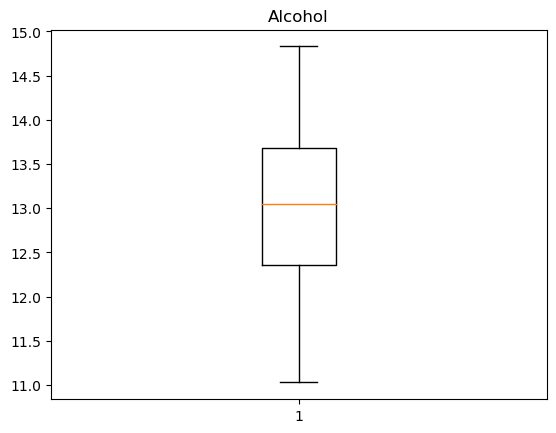

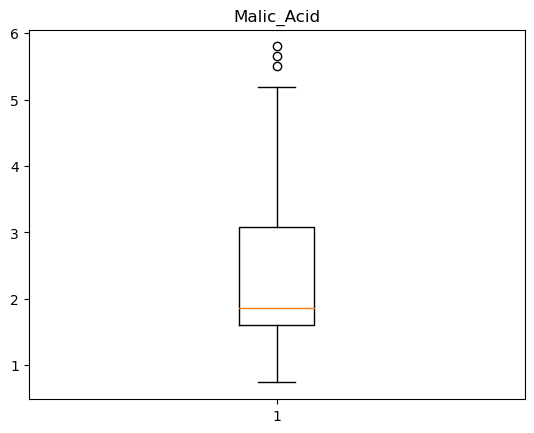

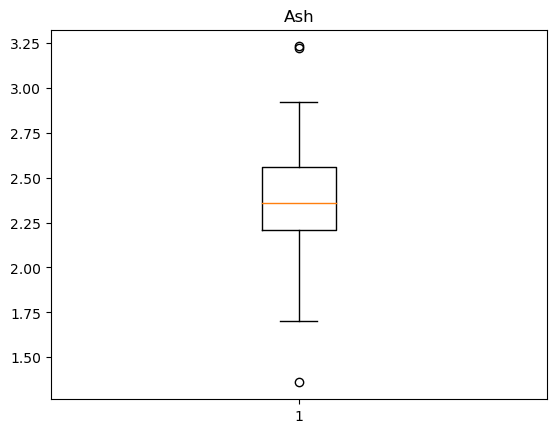

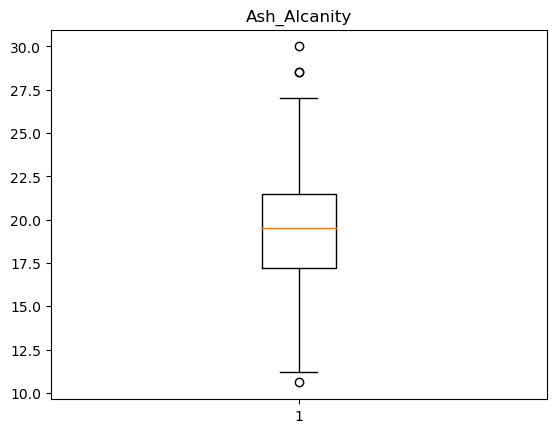

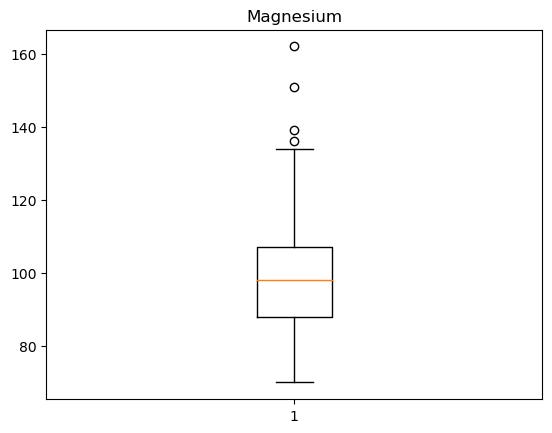

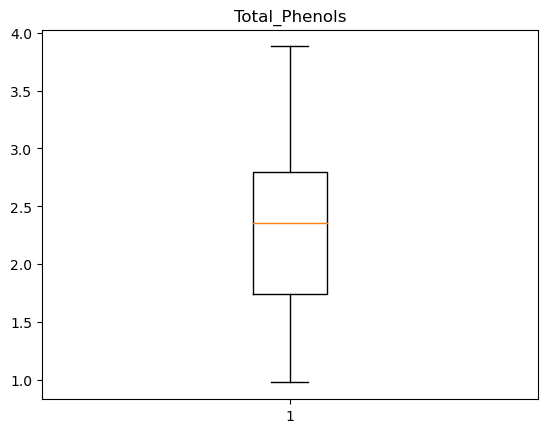

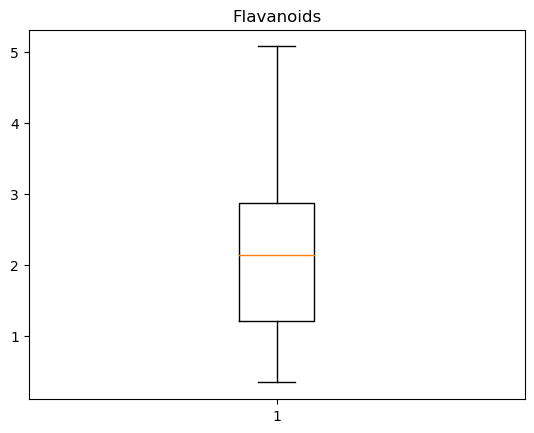

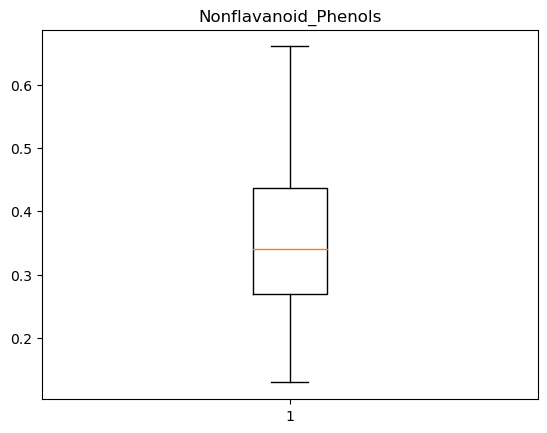

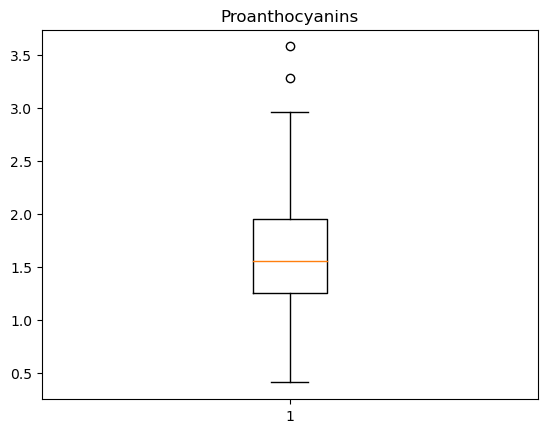

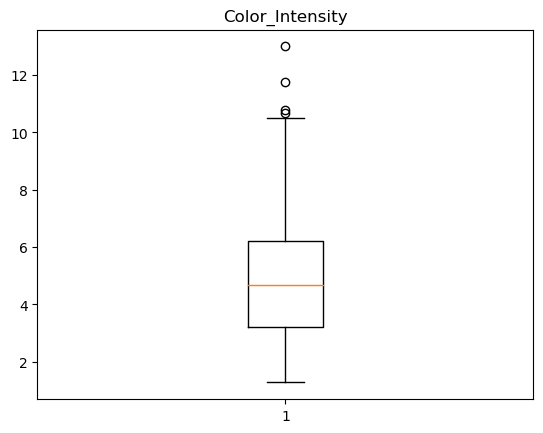

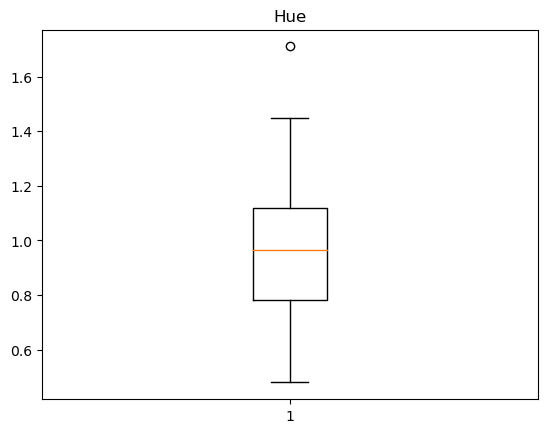

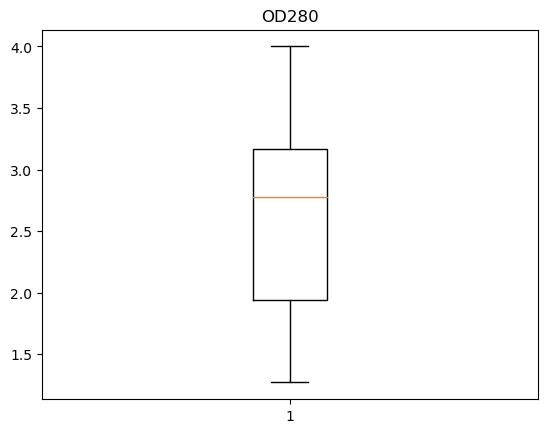

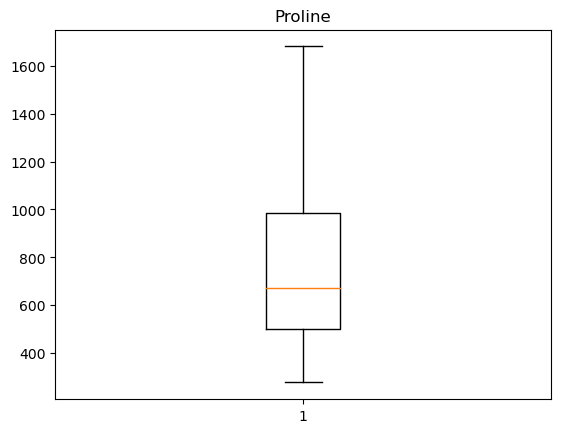

In [8]:
num_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 
               'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
plt.show()    

Data Preprocessing

In [9]:
Q1 = np.percentile(data['Malic_Acid'],25,method='midpoint')
Q2 = np.percentile(data['Malic_Acid'],50,method='midpoint')
Q3 = np.percentile(data['Malic_Acid'],75,method='midpoint')
print("q1 is ",Q1)
print("q2 is ",Q2)
print("q3 is ",Q3)
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
print("min is ", low_lim)
print("max is ",up_lim)

outlier=[]
for x in data['Malic_Acid']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
print("Outliers are ",outlier)        



q1 is  1.605
q2 is  1.8650000000000002
q3 is  3.065
min is  -0.585
max is  5.255
Outliers are  [5.8, 5.51, 5.65]


In [10]:
ind_malic_acid = data['Malic_Acid']>up_lim
ind1_malic_acid = data.loc[ind_malic_acid].index
ind1_malic_acid

Int64Index([123, 137, 173], dtype='int64')

In [11]:
data.drop(ind1_malic_acid,inplace=True)

In [12]:
Q1 = np.percentile(data['Ash'],25,method='midpoint')
Q2 = np.percentile(data['Ash'],50,method='midpoint')
Q3 = np.percentile(data['Ash'],75,method='midpoint')
print("q1 is ",Q1)
print("q2 is ",Q2)
print("q3 is ",Q3)
IQR = Q3 - Q1
low_lim = Q1 - (1.5*IQR)
up_lim = Q3 + (1.5*IQR)
print("min is ", low_lim)
print("max is ",up_lim)

outlier=[]
for x in data['Ash']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
print("Outliers are ",outlier)        


q1 is  2.21
q2 is  2.36
q3 is  2.5549999999999997
min is  1.6925000000000003
max is  3.0724999999999993
Outliers are  [3.22, 1.36, 3.23]


In [13]:
ind_ash = data['Ash']>up_lim
ind1_ash = data.loc[ind_ash].index
ind1_ash

Int64Index([25, 121], dtype='int64')

In [14]:
data.drop(ind1_ash,inplace=True)

In [15]:
ind2_ash = data["Ash"]<low_lim
ind2_ash = data.loc[ind2_ash].index
ind2_ash
data.drop(ind2_ash,inplace = True)

In [16]:
Q1 = np.percentile(data['Ash_Alcanity'],25,method="midpoint")
Q2 = np.percentile(data['Ash_Alcanity'],50,method="midpoint")
Q3 = np.percentile(data['Ash_Alcanity'],75,method="midpoint")
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)
IQR = Q3 -Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print("min is", low_lim)
print("max is", up_lim)


outlier = []
for x in data['Ash_Alcanity']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
print("Ouliers are", outlier )

q1 is 17.15
q2 is 19.25
q3 is 21.5
min is 10.624999999999996
max is 28.025000000000002
Ouliers are [30.0, 28.5]


In [17]:
ind_ash_cal = data['Ash_Alcanity']>up_lim
ind1_ash_cal = data.loc[ind_ash_cal].index
ind1_ash_cal

Int64Index([73, 127], dtype='int64')

In [18]:
data.drop(ind1_ash_cal,inplace = True)

In [19]:
Q1 = np.percentile(data['Magnesium'],25,method="midpoint")
Q2 = np.percentile(data['Magnesium'],50,method="midpoint")
Q3 = np.percentile(data['Magnesium'],75,method="midpoint")
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)
IQR = Q3 -Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print("min is", low_lim)
print("max is", up_lim)


outlier = []
for x in data['Magnesium']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
print("Ouliers are", outlier )

q1 is 88.0
q2 is 98.0
q3 is 107.0
min is 59.5
max is 135.5
Ouliers are [151, 136, 162]


In [20]:
ind_mag = data['Magnesium']>up_lim
ind1_mag = data.loc[ind_mag].index
ind1_mag
data.drop(ind1_mag,inplace = True)

In [21]:
Q1 = np.percentile(data['Proanthocyanins'],25,method="midpoint")
Q2 = np.percentile(data['Proanthocyanins'],50,method="midpoint")
Q3 = np.percentile(data['Proanthocyanins'],75,method="midpoint")
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)
IQR = Q3 -Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print("min is", low_lim)
print("max is", up_lim)


outlier = []
for x in data['Proanthocyanins']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
print("Ouliers are", outlier )

q1 is 1.25
q2 is 1.54
q3 is 1.9249999999999998
min is 0.23750000000000027
max is 2.9374999999999996
Ouliers are [2.96, 3.58]


In [22]:
ind_pro = data['Proanthocyanins']>up_lim
ind1_pro = data.loc[ind_pro].index
ind1_pro
data.drop(ind1_pro,inplace = True)

In [23]:
Q1 = np.percentile(data['Color_Intensity'],25,method="midpoint")
Q2 = np.percentile(data['Color_Intensity'],50,method="midpoint")
Q3 = np.percentile(data['Color_Intensity'],75,method="midpoint")
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)
IQR = Q3 -Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print("min is", low_lim)
print("max is", up_lim)


outlier = []
for x in data['Color_Intensity']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
print("Ouliers are", outlier )

q1 is 3.27
q2 is 4.8
q3 is 6.25
min is -1.1999999999999997
max is 10.719999999999999
Ouliers are [10.8, 13.0, 11.75]


In [24]:
ind_color = data['Color_Intensity']>up_lim
ind1_color = data.loc[ind_color].index
ind1_color
data.drop(ind1_color,inplace = True)

In [25]:
Q1 = np.percentile(data['Hue'],25,method="midpoint")
Q2 = np.percentile(data['Hue'],50,method="midpoint")
Q3 = np.percentile(data['Hue'],75,method="midpoint")
print("q1 is",Q1)
print("q2 is",Q2)
print("q3 is",Q3)
IQR = Q3 -Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print("min is", low_lim)
print("max is", up_lim)


outlier = []
for x in data['Hue']:
    if((x>up_lim)or(x<low_lim)):
        outlier.append(x)
        
print("Ouliers are", outlier )

q1 is 0.795
q2 is 0.97
q3 is 1.12
min is 0.30749999999999994
max is 1.6075000000000002
Ouliers are [1.71]


In [26]:
ind_hue = data['Hue']>up_lim
ind1_hue = data.loc[ind_hue].index
ind1_hue
data.drop(ind1_hue,inplace = True)

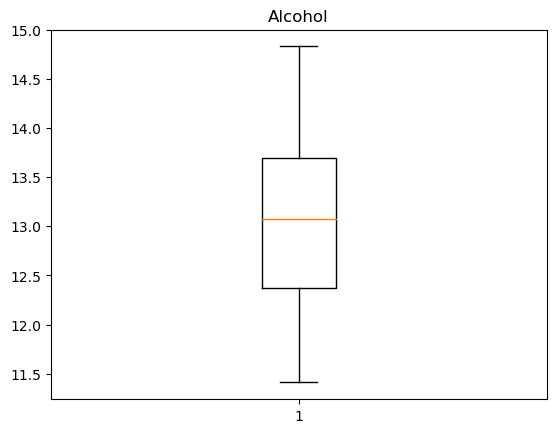

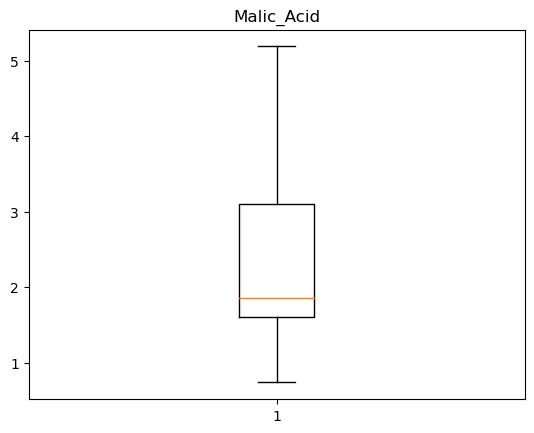

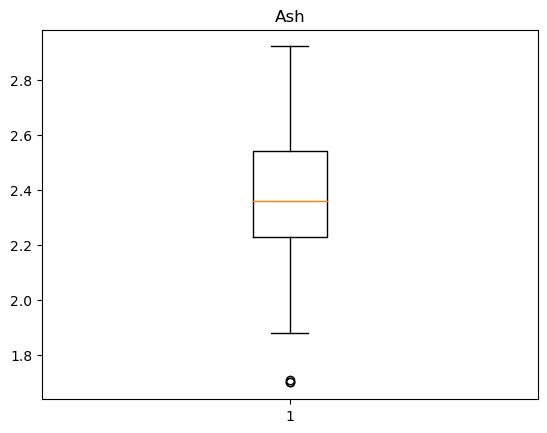

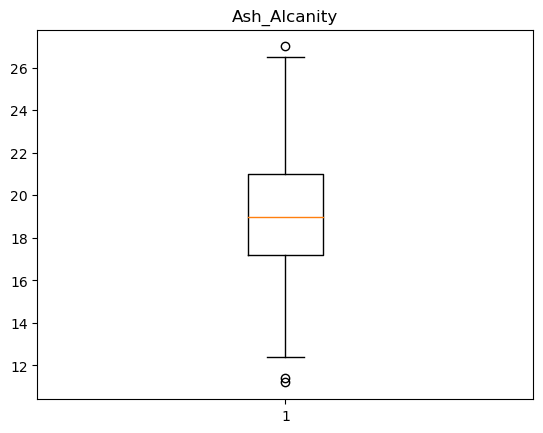

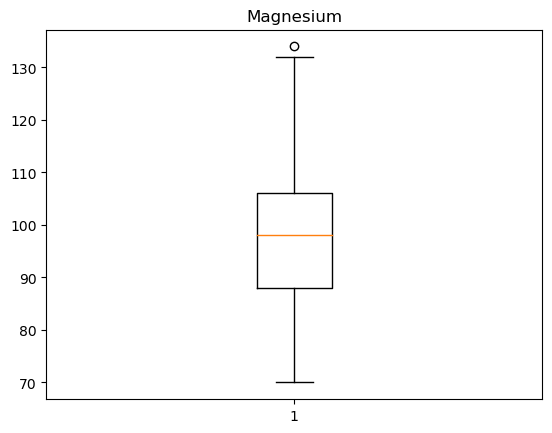

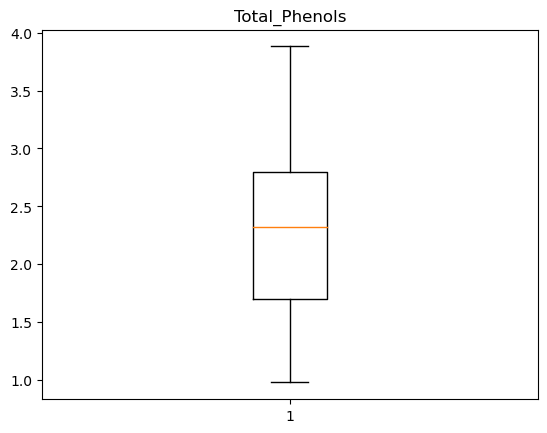

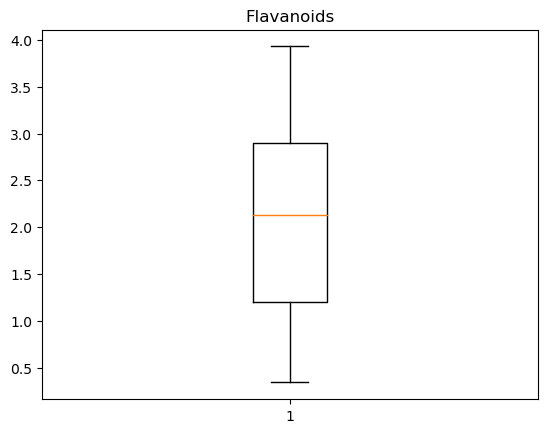

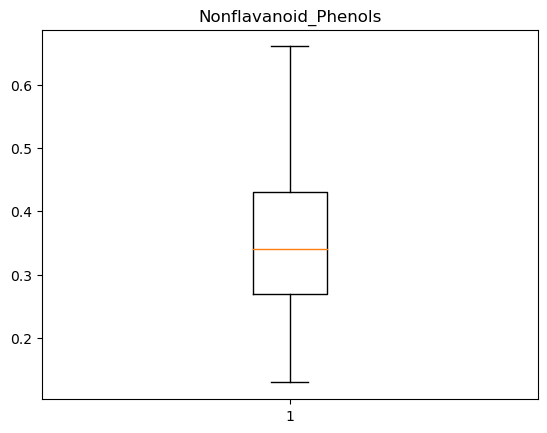

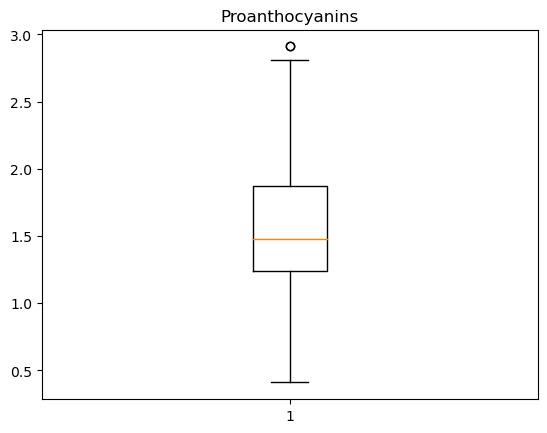

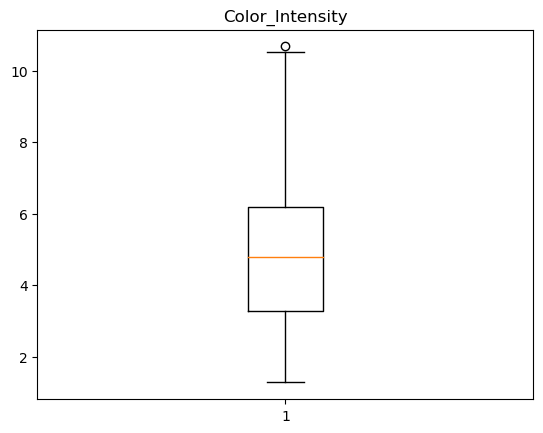

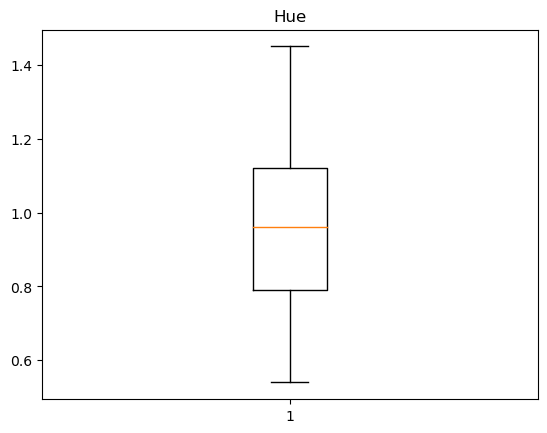

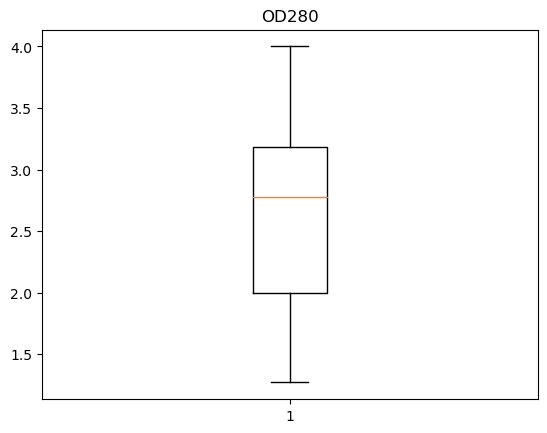

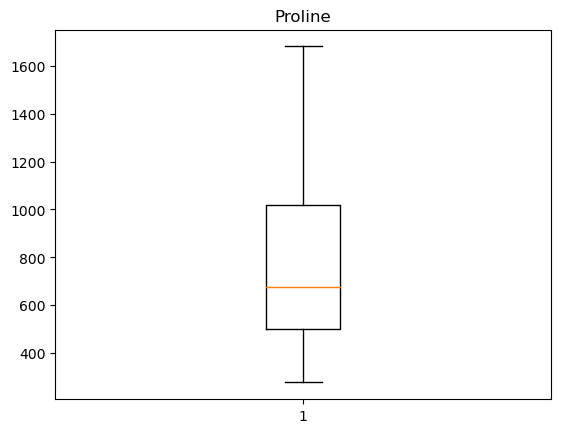

In [27]:
num_columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 
               'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

for i in num_columns:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
plt.show()    

In [28]:
data.shape

(161, 13)

In [29]:
#from sklearn.preprocessing import StandardScaler

In [30]:
#std = StandardScaler()

In [31]:
#scaled_data = scaler.fit_transform(data)

In [32]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

K Means

In [33]:
X = data[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']]

In [34]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,13.034596,2.318199,2.364658,19.300621,98.590062,2.280435,2.026894,0.359006,1.538758,5.033913,0.956932,2.619876,753.819876
std,0.791422,1.053406,0.241922,2.974149,12.401347,0.628964,0.981421,0.121821,0.513838,2.155207,0.217376,0.713409,317.816297
min,11.410000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.540000,1.270000,278.000000
25%,12.370000,1.610000,2.230000,17.200000,88.000000,1.700000,1.200000,0.270000,1.240000,3.270000,0.790000,2.000000,502.000000
50%,13.070000,1.860000,2.360000,19.000000,98.000000,2.320000,2.130000,0.340000,1.480000,4.800000,0.960000,2.780000,675.000000
75%,13.690000,3.100000,2.540000,21.000000,106.000000,2.800000,2.900000,0.430000,1.870000,6.200000,1.120000,3.180000,1020.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,3.930000,0.660000,2.910000,10.680000,1.450000,4.000000,1680.000000


In [35]:
#X_std = std.fit_transform(X)

In [36]:
#X_std

In [37]:
from sklearn.cluster import KMeans

In [38]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,n_init=20)
    km.fit(X)
    css=km.inertia_
    print('Clusters= ',i,'wcss= ',css)
    
    wcss.append(css)

Clusters=  1 wcss=  16188555.34034952
Clusters=  2 wcss=  4040536.7356572137
Clusters=  3 wcss=  2091944.417095361
Clusters=  4 wcss=  1197934.6970813852
Clusters=  5 wcss=  801478.8857107182
Clusters=  6 wcss=  571001.2363898355
Clusters=  7 wcss=  361093.63079508225
Clusters=  8 wcss=  289040.8504630479
Clusters=  9 wcss=  240852.619789509
Clusters=  10 wcss=  193292.83976377503


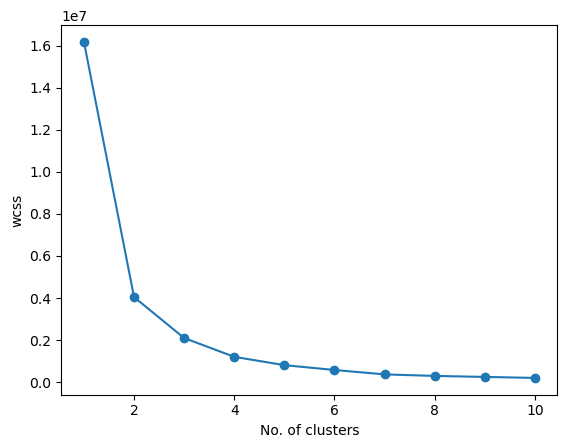

In [39]:
plt.plot(range(1,11),wcss,marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.show()

Optimal number of cluster = 2

In [40]:
km = KMeans(n_clusters=2,n_init=20)
km.fit(X)

KMeans(n_clusters=2, n_init=20)

In [41]:
cluster_labels = km.predict(X)
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [42]:
from sklearn.metrics import silhouette_score
sil_km = silhouette_score(X,cluster_labels)
sil_km

0.6599516439224017

Agglomerative Clustering

In [43]:
import scipy.cluster.hierarchy as sch

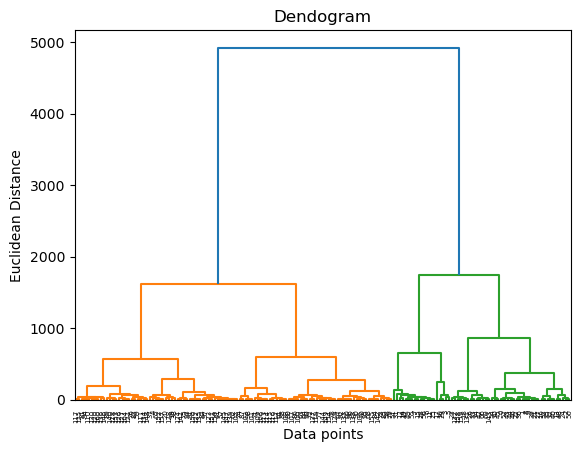

In [44]:
dendogram = sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean Distance')
plt.show()

From dendrogram optimal number of cluster = 2

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
ahc = AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_ahc = ahc.fit_predict(data)

C:\Users\ajiakshay\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [47]:
y_ahc

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [48]:
sil_ahc = silhouette_score(data,y_ahc)

In [49]:
sil_ahc

0.6543246376053309

DB SCAN Clustering

In [50]:
from sklearn.datasets import make_blobs #create datapoint which will have a cluster kind of arrangement
from sklearn.neighbors import NearestNeighbors


In [51]:
neigh = NearestNeighbors()
nbrs = neigh.fit(X)


In [52]:
distance,indices = nbrs.kneighbors(X)

In [53]:
distance

array([[  0.        ,  10.3928052 ,  22.34074753,  24.76023223,
         25.09466278],
       [  0.        ,   6.78638343,   7.83291772,  13.14076482,
         16.01121794],
       [  0.        ,  12.2969915 ,  13.16761937,  36.71057341,
         37.15471975],
       [  0.        ,  30.09196903,  31.15941752,  35.80962161,
        105.04076923],
       [  0.        ,  17.72868015,  20.77652521,  22.42155882,
         27.45302169],
       [  0.        ,  30.09196903,  60.48524365,  65.39770944,
         75.09062658],
       [  0.        ,   6.23935093,  10.34467496,  10.72270022,
         13.38382232],
       [  0.        ,  15.3305512 ,  16.63357147,  17.67303596,
         22.97238995],
       [  0.        ,   3.27007645,   6.78638343,  10.3394584 ,
         11.292161  ],
       [  0.        ,   3.27007645,   7.83291772,  10.54944548,
         11.03619047],
       [  0.        ,   5.41997232,  31.15941752,  60.48524365,
        135.37838712],
       [  0.        ,   5.29867908,   9.811

In [54]:
indices

array([[  0,  52,  43,  46,  44],
       [  1,   8,   9,  46,  21],
       [  2,  50,  24,  48,  13],
       [  3,   5,  10,  29,  51],
       [  4,  65, 152, 157, 141],
       [  5,   3,  10,  29,  51],
       [  6,  25,  11,  28,  56],
       [  7,  15,  56,  14,  28],
       [  8,   9,   1,  27,  21],
       [  9,   8,   1,  27,  21],
       [ 10,  29,   3,   5,  51],
       [ 11,  25,  28,   6,  55],
       [ 12,  14,   6,  25,  28],
       [ 13,  48,  16,   2,  53],
       [ 14,   7,  12,  56,   6],
       [ 15,  56,   7,  28,  55],
       [ 16,  53,  35,  48,  13],
       [ 17,  29,  10,   3,   5],
       [ 18, 159, 131, 158,  23],
       [ 19,  38,  37,  20,  65],
       [ 20, 128, 157, 152,  65],
       [ 21,  27,   9,   8,  39],
       [ 22,  36,  27,  39,  21],
       [ 23, 132, 131,  18, 159],
       [ 24,   2,  50,  48,  13],
       [ 25,  11,   6,  28,  56],
       [ 26,  33,  69,  42,  34],
       [ 27,  21,  39,   8,   9],
       [ 28,  56,  25,  11,   6],
       [ 29,  

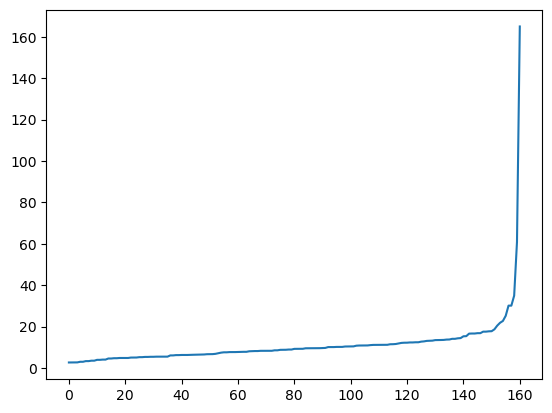

In [55]:
distances = np.sort(distance,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [56]:
from sklearn.cluster import DBSCAN

eps value taken is 35 from graph, which is the radius of the most of the clusters  

In [57]:
clustering = DBSCAN(eps=35,min_samples=3)
clustering.fit(X)

DBSCAN(eps=35, min_samples=3)

In [58]:
clusters = clustering.labels_ # -1 is considered as noise

In [59]:
len(set(clusters))

7

In [60]:
silhouette_score(X,clusters)

0.46967058501533676

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

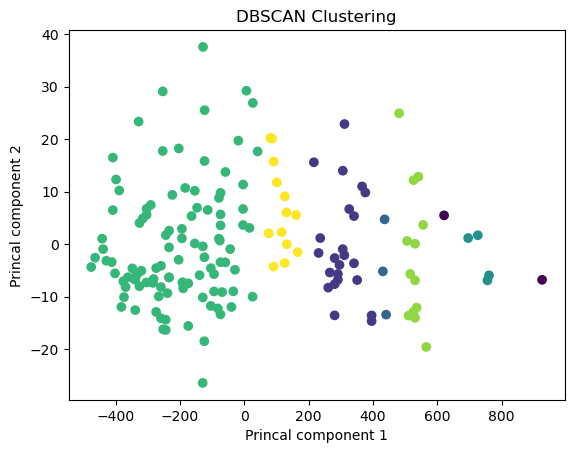

In [64]:
plt.scatter(X_pca[:,0],X_pca[:,1], c= clustering.labels_, cmap = 'viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Princal component 1')
plt.ylabel('Princal component 2')
plt.show()